### import the lybraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### reading data 

In [2]:
df= pd.read_csv("E:\\My Courses\\Candy-data.csv")
df.head(20)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [3]:
df=df.iloc[:,1:]
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9)
memory usage: 8.0 KB


In [5]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


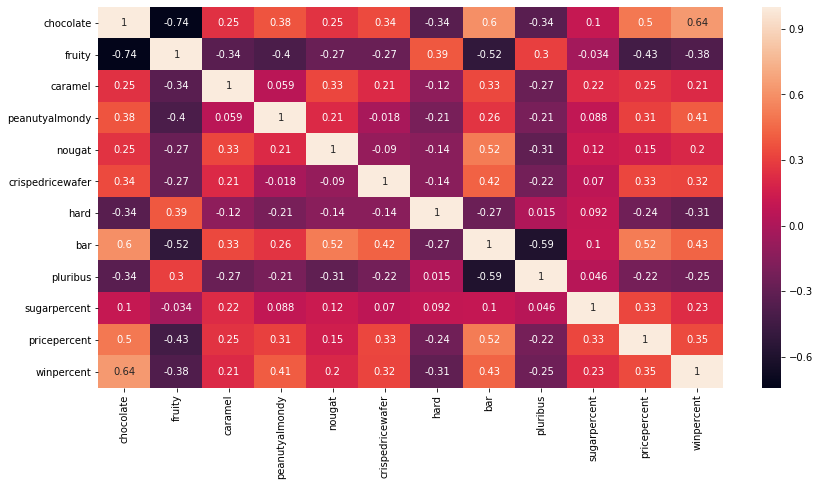

In [6]:
#show the heatmap
df_X=df
plt.figure(figsize=(14,7))
sns.heatmap(df_X.corr(), annot=True)

In [7]:
#get the countplot for most of feature ..
df['chocolate'].value_counts()

0    48
1    37
Name: chocolate, dtype: int64

In [8]:
df['fruity'].value_counts()

0    47
1    38
Name: fruity, dtype: int64

In [9]:
df['caramel'].value_counts()

0    71
1    14
Name: caramel, dtype: int64

In [10]:
df['peanutyalmondy'].value_counts()

0    71
1    14
Name: peanutyalmondy, dtype: int64

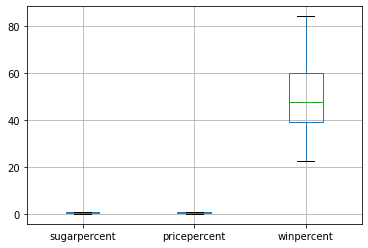

In [11]:
#see if there is outliers
df.boxplot(column=['sugarpercent','pricepercent','winpercent'])
plt.show()

In [12]:
# here are the most important features as we saw at the heatmap
X=df[['fruity','bar' , 'pricepercent','winpercent']]
y=df[['chocolate']]

### applying Logistic Regression 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4 ,stratify=y)

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

E:\programs\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\programs\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# get the accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8823529411764706


### so we finally got 88 % score .

In [16]:
#get confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)


array([[8, 2],
       [0, 7]], dtype=int64)

In [17]:
# get the report of confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.78      1.00      0.88         7

    accuracy                           0.88        17
   macro avg       0.89      0.90      0.88        17
weighted avg       0.91      0.88      0.88        17

